## Load required packages

In [1]:
using Pkg # import the Pkg module so we can use other packages
Pkg.add("CSV") # install CSV package so we can work with the data provided in a CSV file
Pkg.add("DataFrames") # install to allow to change and analyse the dataframes
Pkg.add("Dates") # install dates package to convert strings to date
Pkg.add("Statistics") # to calculate stats
Pkg.add("Query") # for analysing the data
Pkg.add("Plots") # for plotting

   Resolving package versions...
  No Changes to `C:\Users\diann\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\diann\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\diann\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\diann\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\diann\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\diann\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\diann\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\diann\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\diann\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\diann\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\diann\.julia\environments\v1.9\Project.toml`
  No Changes to 

## Load the data

In [2]:
using CSV # import to use CSV package
using DataFrames # import to use DataFrames package

NZ_cost = CSV.read("NZ_average_price_25_pack_cigarettes.csv", DataFrame) # average price dataset from StatsNZ
NZ_prev = CSV.read("NZ_smoking_prevalence_1983_2017.csv", DataFrame) # smoking prevalence dataset from Tobacco Control Data Repository
NZ_health = CSV.read("NZ_Mortality_Cancer_Trends.csv", DataFrame) # mortality rates dataset from University of Otago
NZ_recent = CSV.read("nz-health-survey-2021-22-prevalences.csv", DataFrame) #smoking prevalence dataset from MOH

Row,population,short.description,year,group,total,flag_for_publishing,total.low.CI,total.high.CI,male,male_flag_for_publishing,male.low.CI,male.high.CI,female,female_flag_for_publishing,female.low.CI,female.high.CI,estimated.number,estimated.number.low.CI,estimated.number.high.CI
,String,String,Int64,String,String,String?,String,String,String,String?,String,String,String,String?,String,String,String,String,String
1,adults,"Excellent, very good or good self-rated health",2021,Total,88.4,missing,86.9,89.8,88.8,missing,86.5,90.7,88.1,missing,86.4,89.6,3674000,3617000,3730000
2,adults,"Excellent, very good or good self-rated health",2021,15-24,91.3,missing,87.4,94.2,93.7,missing,89.6,96.5,88.7,missing,81.8,93.7,585000,565000,605000
3,adults,"Excellent, very good or good self-rated health",2021,25-34,88,missing,84.4,91,88.8,missing,83.1,93.2,87.1,missing,82.1,91.2,656000,633000,680000
4,adults,"Excellent, very good or good self-rated health",2021,35-44,88.9,missing,85.8,91.6,89.1,missing,84.5,92.8,88.7,missing,84.4,92.3,587000,569000,606000
5,adults,"Excellent, very good or good self-rated health",2021,45-54,87.8,missing,83.5,91.3,87.7,missing,81.1,92.7,87.9,missing,83.5,91.5,571000,547000,595000
6,adults,"Excellent, very good or good self-rated health",2021,55-64,86.4,missing,82.9,89.5,86.1,missing,80.2,90.8,86.8,missing,82.4,90.4,539000,519000,558000
7,adults,"Excellent, very good or good self-rated health",2021,65-74,88.6,missing,85.1,91.6,86.6,missing,80.2,91.5,90.5,missing,86.3,93.8,422000,407000,437000
8,adults,"Excellent, very good or good self-rated health",2021,75+,87.4,missing,83.6,90.5,87.8,missing,82.2,92.2,87,missing,81.4,91.4,314000,302000,325000
9,adults,"Excellent, very good or good self-rated health",2021,Māori,81.3,missing,76.8,85.2,81.7,missing,73.8,88,80.9,missing,75.7,85.5,494000,469000,520000


## Wrangling NZ_prev

In [3]:
NZ_prev # see what it looks like

Row,Year,Adults 15+ years (current smoking),Year 10 students (current smoking),Column4
,Int64,String,String,Missing
1,1983,33,null,missing
2,1984,32,null,missing
3,1985,30,null,missing
4,1986,30,null,missing
5,1987,30,null,missing
6,1988,29,null,missing
7,1989,26.5,null,missing
8,1990,27.8,null,missing
9,1991,25.8,null,missing


In [4]:
select!(NZ_prev, Not([:"Year 10 students (current smoking)", "Column4"])) # delete unecessary columns

rename!(NZ_prev, [:Year, :prevalence]) # rename columns

filter!(row -> row.prevalence != "null", NZ_prev) # delete row with null value (2017)

Row,Year,prevalence
,Int64,String
1,1983,33
2,1984,32
3,1985,30
4,1986,30
5,1987,30
6,1988,29
7,1989,26.5
8,1990,27.8
9,1991,25.8


## Wrangling NZ_cost

In [5]:
NZ_cost # see what it looks like

Row,DateTime,Price per pack of 25 ($)
,String,Float64
1,1/03/2009,13.43
2,1/06/2009,13.43
3,1/09/2009,13.32
4,1/12/2009,13.28
5,1/03/2010,13.46
6,1/06/2010,14.31
7,1/09/2010,14.73
8,1/12/2010,15.02
9,1/03/2011,16.39


In [6]:
rename!(NZ_cost, [:date, :cost]) # rename variables

Row,date,cost
,String,Float64
1,1/03/2009,13.43
2,1/06/2009,13.43
3,1/09/2009,13.32
4,1/12/2009,13.28
5,1/03/2010,13.46
6,1/06/2010,14.31
7,1/09/2010,14.73
8,1/12/2010,15.02
9,1/03/2011,16.39


In [7]:
using Dates
using Statistics

NZ_cost.date = Date.(NZ_cost.date, "dd/mm/yyyy") # convert to date so we can extract year

NZ_cost[!, :Year] = Dates.year.(NZ_cost[!, :date]) # pulls year as int64

cost_df = combine(groupby(NZ_cost, :Year), :cost => mean) # new df with variables year and cost_mean which is the average price per year

Row,Year,cost_mean
,Int64,Float64
1,2009,13.365
2,2010,14.38
3,2011,16.39
4,2012,18.46
5,2013,20.79
6,2014,23.0725
7,2015,26.425
8,2016,28.805
9,2017,31.65


## Join tables + tidy

In [8]:
joined_df = outerjoin(cost_df, NZ_prev, on = :Year) # outer join to combine prevalence and cost data with 'year' as the common column. Outer join keeping all data.

Row,Year,cost_mean,prevalence
,Int64,Float64?,String?
1,2009,13.365,19.7
2,2010,14.38,19.7
3,2011,16.39,18.4
4,2012,18.46,17.6
5,2013,20.79,17.4
6,2014,23.0725,16.6
7,2015,26.425,16.3
8,2016,28.805,15.7
9,2017,31.65,missing


In [9]:
# function that changes missing values to NaN and converts string to float
function custom_parse_float(x)
    try
        return parse(Float64, x)
    catch
        return NaN
    end
end

custom_parse_float (generic function with 1 method)

In [10]:
joined_df[!, :prev_float] = [custom_parse_float(x) for x in joined_df[!, :prevalence]] # create new column with Float64 values, replacing missing with NaN
joined_df[!, :cost_mean] .= coalesce.(joined_df[!, :cost_mean], NaN) # change missing values in the "cost_mean" column to NaN

37-element Vector{Float64}:
  13.365
  14.379999999999999
  16.39
  18.46
  20.79
  23.072499999999998
  26.425000000000004
  28.805
  31.65
  35.0175
  37.48
 NaN
 NaN
   ⋮
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

In [11]:
select!(joined_df, Not([:prevalence])) # remove prevalence (string) column

Row,Year,cost_mean,prev_float
,Int64,Float64,Float64
1,2009,13.365,19.7
2,2010,14.38,19.7
3,2011,16.39,18.4
4,2012,18.46,17.6
5,2013,20.79,17.4
6,2014,23.0725,16.6
7,2015,26.425,16.3
8,2016,28.805,15.7
9,2017,31.65,NaN


## Wrangle NZ_recent

In [12]:
NZ_recent # see what it looks like

Row,population,short.description,year,group,total,flag_for_publishing,total.low.CI,total.high.CI,male,male_flag_for_publishing,male.low.CI,male.high.CI,female,female_flag_for_publishing,female.low.CI,female.high.CI,estimated.number,estimated.number.low.CI,estimated.number.high.CI
,String,String,Int64,String,String,String?,String,String,String,String?,String,String,String,String?,String,String,String,String,String
1,adults,"Excellent, very good or good self-rated health",2021,Total,88.4,missing,86.9,89.8,88.8,missing,86.5,90.7,88.1,missing,86.4,89.6,3674000,3617000,3730000
2,adults,"Excellent, very good or good self-rated health",2021,15-24,91.3,missing,87.4,94.2,93.7,missing,89.6,96.5,88.7,missing,81.8,93.7,585000,565000,605000
3,adults,"Excellent, very good or good self-rated health",2021,25-34,88,missing,84.4,91,88.8,missing,83.1,93.2,87.1,missing,82.1,91.2,656000,633000,680000
4,adults,"Excellent, very good or good self-rated health",2021,35-44,88.9,missing,85.8,91.6,89.1,missing,84.5,92.8,88.7,missing,84.4,92.3,587000,569000,606000
5,adults,"Excellent, very good or good self-rated health",2021,45-54,87.8,missing,83.5,91.3,87.7,missing,81.1,92.7,87.9,missing,83.5,91.5,571000,547000,595000
6,adults,"Excellent, very good or good self-rated health",2021,55-64,86.4,missing,82.9,89.5,86.1,missing,80.2,90.8,86.8,missing,82.4,90.4,539000,519000,558000
7,adults,"Excellent, very good or good self-rated health",2021,65-74,88.6,missing,85.1,91.6,86.6,missing,80.2,91.5,90.5,missing,86.3,93.8,422000,407000,437000
8,adults,"Excellent, very good or good self-rated health",2021,75+,87.4,missing,83.6,90.5,87.8,missing,82.2,92.2,87,missing,81.4,91.4,314000,302000,325000
9,adults,"Excellent, very good or good self-rated health",2021,Māori,81.3,missing,76.8,85.2,81.7,missing,73.8,88,80.9,missing,75.7,85.5,494000,469000,520000


In [13]:
using Query
columns_keep = ["short.description", "year", "group", "total"] # define columns we want
NZ_recent = select(NZ_recent, Symbol.(columns_keep)) # rewrite df with only wanted columns

NZ_recent = filter(row -> row."short.description" == "Current smokers" && row.group == "Total", NZ_recent) # filter for only current smokers and total (rather than including ethnicity, etc)

columns_keep = ["year", "total"] # define columns we want
NZ_recent = select(NZ_recent, Symbol.(columns_keep)) # rewrite df with only columns we want

rename!(NZ_recent, [:Year, :recent_prev]) # rename columns

Row,Year,recent_prev
,Int64,String
1,2021,9.2
2,2011,18.4
3,2012,17.9
4,2013,17.6
5,2014,16.8
6,2015,16.6
7,2016,16
8,2017,15.1
9,2018,14.7


## Join tables

In [14]:
joined_df_2 = outerjoin(joined_df, NZ_recent, on = :Year) # join tables on year column

Row,Year,cost_mean,prev_float,recent_prev
,Int64,Float64?,Float64?,String?
1,2011,16.39,18.4,18.4
2,2012,18.46,17.6,17.9
3,2013,20.79,17.4,17.6
4,2014,23.0725,16.6,16.8
5,2015,26.425,16.3,16.6
6,2016,28.805,15.7,16
7,2017,31.65,NaN,15.1
8,2018,35.0175,NaN,14.7
9,2019,37.48,NaN,13.7


In [15]:
joined_df_2[!, :recent_prev] = [custom_parse_float(x) for x in joined_df_2[!, :recent_prev]] # convert string to float and replace missing with NaN using previous function 

cols_replace = [:cost_mean, :prev_float] # replace missing values with NaN
for col in cols_replace
    joined_df_2[!, col] .= coalesce.(joined_df_2[!, col], NaN)
end

joined_df_2

Row,Year,cost_mean,prev_float,recent_prev
,Int64,Float64,Float64,Float64
1,2011,16.39,18.4,18.4
2,2012,18.46,17.6,17.9
3,2013,20.79,17.4,17.6
4,2014,23.0725,16.6,16.8
5,2015,26.425,16.3,16.6
6,2016,28.805,15.7,16.0
7,2017,31.65,NaN,15.1
8,2018,35.0175,NaN,14.7
9,2019,37.48,NaN,13.7


### Wrangle NZ_health

In [16]:
using Query

columns_keep = ["CenYear", "EventCode", "StdRate", "SSex"] # define which columns we want
NZ_health = select(NZ_health, Symbol.(columns_keep)) # rewrite df as only the columns we want to work with
NZ_health

Row,CenYear,EventCode,StdRate,SSex
,Int64,String,Float64,String
1,1981,Cardiovascular Disease (all) Mortality,287.5,Males
2,1986,Cardiovascular Disease (all) Mortality,249.8,Males
3,1991,Cardiovascular Disease (all) Mortality,208.0,Males
4,1996,Cardiovascular Disease (all) Mortality,163.6,Males
5,2001,Cardiovascular Disease (all) Mortality,131.7,Males
6,2006,Cardiovascular Disease (all) Mortality,98.6,Males
7,1981,Cardiovascular Disease (all) Mortality,144.8,Females
8,1986,Cardiovascular Disease (all) Mortality,120.8,Females
9,1991,Cardiovascular Disease (all) Mortality,97.7,Females


In [17]:
values = ["External Injuries (All) Mortality", "Infectious Diseases Mortality"] # define values to remove 
filter!(row -> !(row.EventCode in values), NZ_health) # remove causes of death unreleated to smoking

Row,CenYear,EventCode,StdRate,SSex
,Int64,String,Float64,String
1,1981,Cardiovascular Disease (all) Mortality,287.5,Males
2,1986,Cardiovascular Disease (all) Mortality,249.8,Males
3,1991,Cardiovascular Disease (all) Mortality,208.0,Males
4,1996,Cardiovascular Disease (all) Mortality,163.6,Males
5,2001,Cardiovascular Disease (all) Mortality,131.7,Males
6,2006,Cardiovascular Disease (all) Mortality,98.6,Males
7,1981,Cardiovascular Disease (all) Mortality,144.8,Females
8,1986,Cardiovascular Disease (all) Mortality,120.8,Females
9,1991,Cardiovascular Disease (all) Mortality,97.7,Females


In [18]:
unique(NZ_health.EventCode) # check what causes of death remain

4-element Vector{String}:
 "Cardiovascular Disease (all) Mortality"
 "Cancer (all) Mortality"
 "Respiratory (all) Mortality"
 "Diabetes Mortality"

In [19]:
NZ_health.StdRate .= NZ_health.StdRate ./ 10 # convert rate from per 100,000 to per 1,000,000 to plot on same graph as other variables and share same axis

48-element Vector{Float64}:
 28.75
 24.98
 20.8
 16.36
 13.169999999999998
  9.86
 14.48
 12.08
  9.77
  7.56
  6.470000000000001
  4.64
 15.6
  ⋮
  1.16
  1.22
  1.27
  1.54
  1.8199999999999998
  1.5
  0.9800000000000001
  0.9400000000000001
  1.09
  1.1300000000000001
  1.17
  0.86

In [20]:
grouped = combine(groupby(NZ_health, [:CenYear, :EventCode]), :StdRate => mean) # average male and female data per year/event

Row,CenYear,EventCode,StdRate_mean
,Int64,String,Float64
1,1981,Cardiovascular Disease (all) Mortality,21.615
2,1986,Cardiovascular Disease (all) Mortality,18.53
3,1991,Cardiovascular Disease (all) Mortality,15.285
4,1996,Cardiovascular Disease (all) Mortality,11.96
5,2001,Cardiovascular Disease (all) Mortality,9.82
6,2006,Cardiovascular Disease (all) Mortality,7.25
7,1981,Cancer (all) Mortality,13.73
8,1986,Cancer (all) Mortality,13.6
9,1991,Cancer (all) Mortality,13.45


In [21]:
NZ_health_wide = unstack(grouped, :EventCode, :StdRate_mean) # make dataframe wide
rename!(NZ_health_wide, [:Year, :cardiovascular, :cancer, :respiratory, :diabetes]) # rename columns

Row,Year,cardiovascular,cancer,respiratory,diabetes
,Int64,Float64?,Float64?,Float64?,Float64?
1,1981,21.615,13.73,3.115,1.07
2,1986,18.53,13.6,2.91,1.08
3,1991,15.285,13.45,2.325,1.18
4,1996,11.96,13.165,2.175,1.335
5,2001,9.82,13.075,2.165,1.495
6,2006,7.25,11.645,1.775,1.18


## Join tables

In [22]:
joined_df_3 = innerjoin(NZ_health_wide, joined_df, on = :Year) # join tables on year column. Inner join to keep only years that have the health information.
select!(joined_df_3, Not([:cost_mean])) # no values for these years

Row,Year,cardiovascular,cancer,respiratory,diabetes,prev_float
,Int64,Float64?,Float64?,Float64?,Float64?,Float64
1,1986,18.53,13.6,2.91,1.08,30.0
2,1991,15.285,13.45,2.325,1.18,25.8
3,1996,11.96,13.165,2.175,1.335,26.0
4,2001,9.82,13.075,2.165,1.495,25.0
5,2006,7.25,11.645,1.775,1.18,20.4


## Plots before joining data to fact table

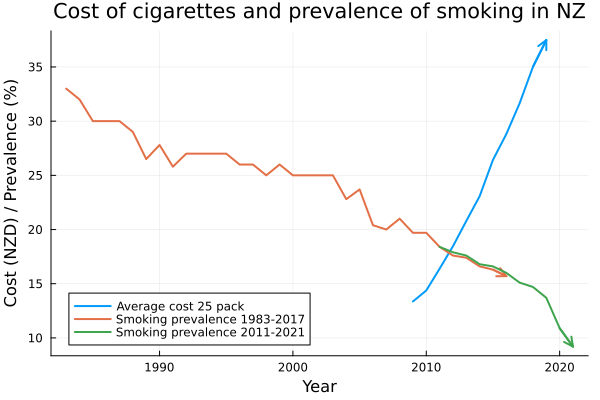

In [23]:
using Plots

y = [joined_df_2.cost_mean, joined_df_2.prev_float, joined_df_2.recent_prev]
plot(joined_df_2.Year, y, seriestype=:line, label=["Average cost 25 pack" "Smoking prevalence 1983-2017" "Smoking prevalence 2011-2021"], 
    title="Cost of cigarettes and prevalence of smoking in NZ", ylabel="Cost (NZD) / Prevalence (%)", xlabel="Year", 
    legend=:bottomleft, lw=2, arrow = :arrow, size = (600, 400))

savefig("NZ_prev_cost_1983-2021.png") # save the plot to file

In [24]:
filtered_df_1 = filter(row -> row.Year >= 2009, joined_df_2) # filter to only include years where there is cost data (i.e. 2009+)

Row,Year,cost_mean,prev_float,recent_prev
,Int64,Float64,Float64,Float64
1,2011,16.39,18.4,18.4
2,2012,18.46,17.6,17.9
3,2013,20.79,17.4,17.6
4,2014,23.0725,16.6,16.8
5,2015,26.425,16.3,16.6
6,2016,28.805,15.7,16.0
7,2017,31.65,NaN,15.1
8,2018,35.0175,NaN,14.7
9,2019,37.48,NaN,13.7


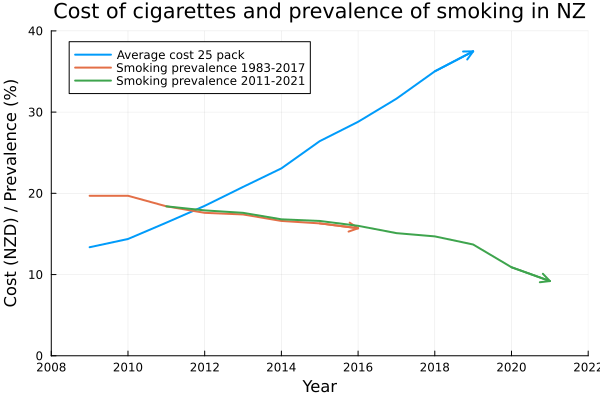

In [25]:
using Plots

y = [filtered_df_1.cost_mean, filtered_df_1.prev_float, filtered_df_1.recent_prev]
plot(filtered_df_1.Year, y, seriestype=:line, label=["Average cost 25 pack" "Smoking prevalence 1983-2017" "Smoking prevalence 2011-2021"], 
    title="Cost of cigarettes and prevalence of smoking in NZ", ylabel="Cost (NZD) / Prevalence (%)", xlabel="Year", 
    legend=:topleft, lw=2, arrow = :arrow, size = (600, 400), ylims=(0, 40), xlims=(2008, 2022))

savefig("NZ_prev_cost_2009-2021.png")

## year is a float on graph despite being int in df??
## setting xlims fixed float issue, but 2022 gets cut off on the axis? No change with resizing plot.
## ylims set to start at 0 doesn't look as pretty as the default range

In [26]:
joined_df_3[!, :total_rate] = joined_df_3.cardiovascular + joined_df_3.diabetes + joined_df_3.cancer + joined_df_3.respiratory # calculate the total rate of mortality for the 4 types

joined_df_3

Row,Year,cardiovascular,cancer,respiratory,diabetes,prev_float,total_rate
,Int64,Float64?,Float64?,Float64?,Float64?,Float64,Float64
1,1986,18.53,13.6,2.91,1.08,30.0,36.12
2,1991,15.285,13.45,2.325,1.18,25.8,32.24
3,1996,11.96,13.165,2.175,1.335,26.0,28.635
4,2001,9.82,13.075,2.165,1.495,25.0,26.555
5,2006,7.25,11.645,1.775,1.18,20.4,21.85


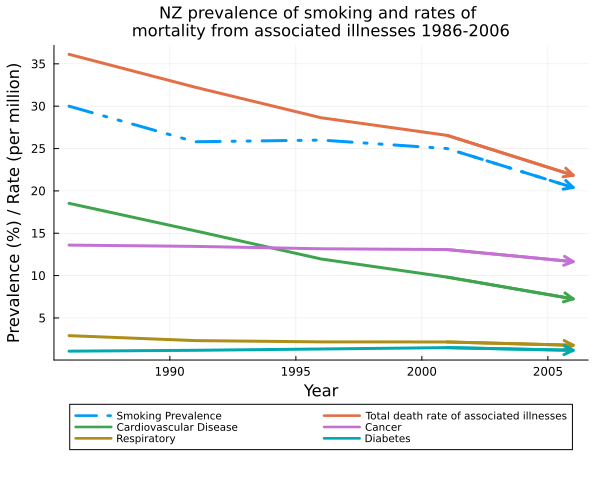

In [27]:
y_prev = joined_df_3.prev_float
y_cardiovascular = joined_df_3.cardiovascular
y_cancer = joined_df_3.cancer
y_respiratory = joined_df_3.respiratory
y_diabetes = joined_df_3.diabetes
y_total = joined_df_3.total_rate

plot(
    joined_df_3.Year, y_prev, seriestype=:line, label="Smoking Prevalence",
    title="NZ prevalence of smoking and rates of \nmortality from associated illnesses 1986-2006",
    titlefont = font(11),
    ylabel="Prevalence (%) / Rate (per million)", xlabel="Year", arrow = :arrow,
    legend=:outerbottom, legendfontsize=7, legendcolumns=2, 
    lw=3, linestyle=:dashdotdot, size=(600, 500)
)
plot!(
    joined_df_3.Year, y_total, seriestype=:line, lw=3, label="Total death rate of associated illnesses", arrow = :arrow,
   )
plot!(
    joined_df_3.Year, y_cardiovascular, seriestype=:line, lw=3, label="Cardiovascular Disease", arrow = :arrow,
    )
plot!(
    joined_df_3.Year, y_cancer, seriestype=:line, lw=3, label="Cancer", arrow = :arrow,
    )
plot!(
    joined_df_3.Year, y_respiratory, seriestype=:line, lw=3, label="Respiratory", arrow = :arrow,
    )
plot!(
    joined_df_3.Year, y_diabetes, seriestype=:line, lw=3, label="Diabetes", arrow = :arrow,
   )

savefig("NZ_prevalence_mortality.png")

## Preparing NZ data for joining to fact_table in R 
#### (as it proved too difficult to do here in Julia with missing, "missing", NA values).

In [28]:
joined_df_2.CountryCode = fill("NZL", nrow(joined_df_2)) # create new column for country to match fact table 
joined_df_2.GenderCode = fill("BTSX", nrow(joined_df_2)) # new column for gender

joined_df_2

Row,Year,cost_mean,prev_float,recent_prev,CountryCode,GenderCode
,Int64,Float64,Float64,Float64,String,String
1,2011,16.39,18.4,18.4,NZL,BTSX
2,2012,18.46,17.6,17.9,NZL,BTSX
3,2013,20.79,17.4,17.6,NZL,BTSX
4,2014,23.0725,16.6,16.8,NZL,BTSX
5,2015,26.425,16.3,16.6,NZL,BTSX
6,2016,28.805,15.7,16.0,NZL,BTSX
7,2017,31.65,NaN,15.1,NZL,BTSX
8,2018,35.0175,NaN,14.7,NZL,BTSX
9,2019,37.48,NaN,13.7,NZL,BTSX


In [29]:
function custom_average(x, y)
    if isnan(x) # if x is NaN, value is y
        y
    elseif isnan(y) # if y is NaN, value is x
        x
    else
        (x + y) / 2 # if neither are NaN, value is average of the two
    end
end

# Calculate the average for 'prev_float' and 'recent_prev' using the custom function above and create new column for the result
joined_df_2.AveragePrev = [custom_average(x, y) for (x, y) in zip(joined_df_2.prev_float, joined_df_2.recent_prev)]

joined_df_2

Row,Year,cost_mean,prev_float,recent_prev,CountryCode,GenderCode,AveragePrev
,Int64,Float64,Float64,Float64,String,String,Float64
1,2011,16.39,18.4,18.4,NZL,BTSX,18.4
2,2012,18.46,17.6,17.9,NZL,BTSX,17.75
3,2013,20.79,17.4,17.6,NZL,BTSX,17.5
4,2014,23.0725,16.6,16.8,NZL,BTSX,16.7
5,2015,26.425,16.3,16.6,NZL,BTSX,16.45
6,2016,28.805,15.7,16.0,NZL,BTSX,15.85
7,2017,31.65,NaN,15.1,NZL,BTSX,15.1
8,2018,35.0175,NaN,14.7,NZL,BTSX,14.7
9,2019,37.48,NaN,13.7,NZL,BTSX,13.7


In [30]:
select!(joined_df_2, Not([:recent_prev, :prev_float])) # remove unwanted prevalence columns that have been averaged

Row,Year,cost_mean,CountryCode,GenderCode,AveragePrev
,Int64,Float64,String,String,Float64
1,2011,16.39,NZL,BTSX,18.4
2,2012,18.46,NZL,BTSX,17.75
3,2013,20.79,NZL,BTSX,17.5
4,2014,23.0725,NZL,BTSX,16.7
5,2015,26.425,NZL,BTSX,16.45
6,2016,28.805,NZL,BTSX,15.85
7,2017,31.65,NZL,BTSX,15.1
8,2018,35.0175,NZL,BTSX,14.7
9,2019,37.48,NZL,BTSX,13.7


In [31]:
CSV.write("nz_data.csv", joined_df_2) # save to use file in R to merge with WHO data